# Introduction to Machine Learning, UZH 2018, Group Project
### Group 2: Barbara Capl, Mathias Lüthi, Pamela Matias, Stefanie Rentsch
##       
# 2. Feature Selection with RandomForestClassifier

In this section we use the feature matrices and the response vector that we prepared in chapter 1.  

#### We use two different versions (created in chapter 1):
Version 1: Feature Matrix consists only of the Ratios                                                                        
Version 2: Feature Matrix consists of Ratios + dummy variables for seasonality + other market data
####   


In [1]:
# hide unnecessary warnings ("depreciation" of packages etc.)
import warnings
warnings.filterwarnings('ignore')

# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestClassifier

## 2.0. Choose which Feature Matrix (Version 1 or 2) you want to load in by choosing the Case
### Available are: Case 1 and Case 2

In [2]:
# If case = 1, Feature Matrix Version 1 is used (see description above below title)
# If case = 2, feature matrix Version 2 is used (see description above below title)

_CASE_ = 2

## 2.1. Preparation

### 2.1.1 Import the Response Vector and the Feature Matrices

In [3]:
# Load in the response vector 
y = pd.read_csv('Data/generated_datasets/response_1.csv', sep=',', header=0)

In [4]:
if _CASE_ == 1:
    X = pd.read_csv('Data/generated_datasets/features_ratios_1.csv', sep=',', header=0)
elif _CASE_ == 2:
    X = pd.read_csv('Data/generated_datasets/features_additional_1.csv', sep=',', header=0)
else: raise ValueError('_CASE_ value must be either 1 or 2')

### 2.1.2. Train/ Test Split and fill missing values with median

Standardization is not done because it is not necessary for Random Forest.

### Train/ Test Split

In [5]:
# Train/test split, into 20% test size and 80% train size because it is a relatively small dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Extract the feature labels
feature_labels = list(X)
print('Type of feature_labels = ' + str(type(feature_labels)))
print("")



Type of feature_labels = <class 'list'>



### Fill missing values

In [6]:
# Use a median fill for train
imp = Imputer(missing_values=np.nan, strategy = 'median' , axis=0)
imputed_dataset = pd.DataFrame(imp.fit_transform(X_train))
imputed_dataset.columns = X_train.columns
imputed_dataset.index = X_train.index
X_train = imputed_dataset

# Use a median fill for the test set
imputed_dataset = pd.DataFrame(imp.fit_transform(X_test))
imputed_dataset.columns = X_test.columns
imputed_dataset.index = X_test.index
X_test = imputed_dataset

### 2.2.3. Print out Shape and Form of Feature Matrix and Response Vector

### Train set

In [7]:
print('Shape of Feature Matrix X_train = ' + str(X_train.shape))
print("")
print('Feature Matrix X_train')
display(X_train.head())
print("")
print('Response Vector y_train')
display(y_train.head())
print("")

# Check if there is the approximately same percentage of '1' the train response vector
print('Ratio of "Ones" (Train)  =  ' + str(y_train.sum() / y_train.size))

Shape of Feature Matrix X_train = (2836, 181)

Feature Matrix X_train


,SHRFLG,SHRENDDT,BIDLO,ASKHI,PRC,VOL,RET,BID,ASK,SHROUT,...,CUSIP_65410610,CUSIP_71708110,CUSIP_74271810,CUSIP_88579Y10,CUSIP_89417E10,CUSIP_91301710,CUSIP_91324P10,CUSIP_92343V10,CUSIP_92826C83,CUSIP_93114210
1530,0.0,20140929.0,28.04,29.49,29.39,4611190.0,0.024042,29.40,29.41,6340863.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1397,0.0,20130730.0,32.17,34.65,32.17,1296447.0,-0.057168,32.16,32.17,1209589.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2238,0.0,20140330.0,54.31,58.49,56.82,3473222.0,0.026373,56.83,56.84,3786825.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3170,0.0,20120426.0,19.80,20.43,19.88,10100617.0,0.011962,19.87,19.88,5385938.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2244,0.0,20140929.0,55.91,59.74,59.45,2415634.0,0.030865,59.44,59.45,3761281.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Response Vector y_train


,0
1530,1
1397,0
2238,1
3170,1
2244,1



Ratio of "Ones" (Train)  =  0    0.559238
dtype: float64


### Test set

In [8]:
print('Shape of Feature Matrix X_test = ' + str(X_test.shape))
print("")
print('Feature Matrix X_test')
display(X_test.head())
print("")
print('Response Vector y_test')
display(y_test.head())
print("")

# Check if there is the approximately same percentage of '1' in the test response vector
print('Ratio of "Ones" (Test)  =  ' + str(y_test.sum() / y_test.size))

Shape of Feature Matrix X_test = (710, 181)

Feature Matrix X_test


,SHRFLG,SHRENDDT,BIDLO,ASKHI,PRC,VOL,RET,BID,ASK,SHROUT,...,CUSIP_65410610,CUSIP_71708110,CUSIP_74271810,CUSIP_88579Y10,CUSIP_89417E10,CUSIP_91301710,CUSIP_91324P10,CUSIP_92343V10,CUSIP_92826C83,CUSIP_93114210
817,0.0,20141009.0,97.87,103.30,100.75,15283673.0,-0.017073,100.75,100.76,5866161.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2592,0.0,20131030.0,72.43,77.64,75.52,746229.0,0.050202,75.53,75.54,1078864.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1475,0.0,20100225.0,18.53,20.00,18.66,10148052.0,0.025838,18.66,18.67,8069536.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1826,0.0,20090830.0,26.45,30.99,30.01,4201669.0,0.073319,29.95,29.98,2108780.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
599,0.0,20060730.0,56.78,62.45,62.06,2212972.0,0.037966,62.06,62.07,2216537.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Response Vector y_test


,0
817,0
2592,1
1475,1
1826,1
599,1



Ratio of "Ones" (Test)  =  0    0.567606
dtype: float64


###    
## 2.2. Selecting & Extracting Features

### 2.2.1.  Fit forest and show list of best 'n' features according to explanatory value

# ===> MATHIAS LOOP FOR RUNNING THE CODE WITH  random_state 0 to 10 and then select best n features

In [9]:
forest = RandomForestClassifier(random_state = 0)
forest.max_depth = 6
forest.fit(X_train, y_train)

# Check features for their importance for the prediction
feature_importances = forest.feature_importances_

# sort features in line with their importance for the prediction
indices = np.argsort(feature_importances)[::-1]

# print best n features
n = 15
for i in range(n):
    print('{0:2d} {1:7s} {2:6.4f}'.format(i + 1, feature_labels[indices[i]], 
                                          feature_importances[indices[i]]))
del i

 1 RET     0.4802
 2 RETX    0.1520
 3 sprtrn  0.0703
 4 ewretx  0.0683
 5 vwretx  0.0620
 6 ewretd  0.0183
 7 pe_inc  0.0084
 8 pe_op_dil 0.0070
 9 ALTPRC  0.0062
10 debt_ebitda 0.0051
11 cash_ratio 0.0047
12 ps      0.0046
13 SHRENDDT 0.0046
14 VOL     0.0042
15 int_debt 0.0040


### 2.2.2.  Plotting results

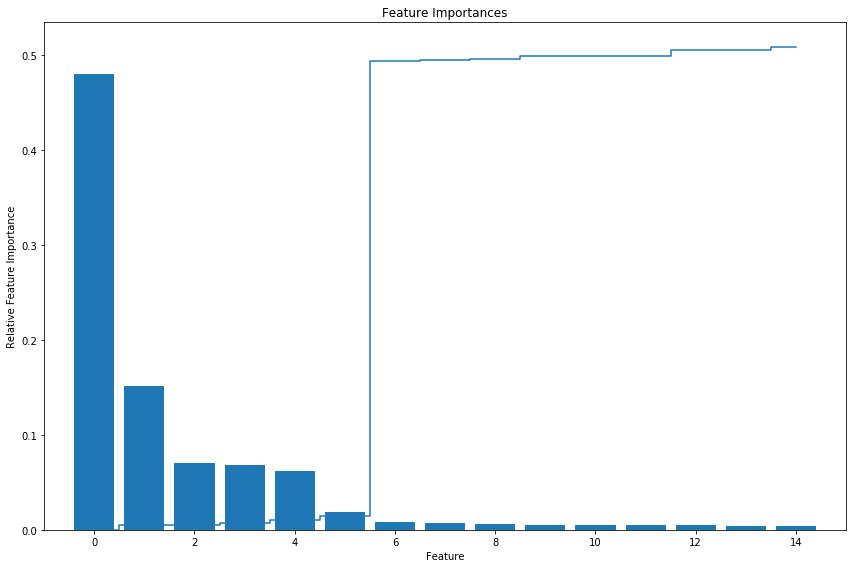

In [10]:
# Get cumsum of the n most important features
feat_imp = np.sort(feature_importances)[::-1]
sum_feat_imp = np.cumsum(feature_importances)[:n]

# Plot Feature Importance (both cumulative and individual)
plt.figure(figsize = (12, 8))
plt.title('Feature Importances')
plt.bar(range(n), feature_importances[indices[:n]], align = 'center')
#plt.xticks(range(n), feature_labels[indices[:n]], rotation = 90)
plt.xlim([-1, n])
plt.xlabel('Feature')
plt.ylabel('Relative Feature Importance')
plt.step(range(n), sum_feat_imp, where = 'mid', label = 'Cumulative Feature Importance')
plt.tight_layout();

### 2.2.3. Extract best 'n' Variables and save into new Feature Matrices


### Extract

In [11]:
# Extract only the n best variables directly from the feature matrix into a new one
best_features = []
n = 15
for i in range(n):
    best_features.append(feature_labels[indices[i]])
del i
X_train_s = X_train[best_features]
X_test_s = X_test[best_features]

feature_labels_s = X_train_s.columns[:-1]

In [12]:
print("")
print('Feature Matrix with selected Features (Train)')
display(X_train_s.head())
print("")
print('Feature Matrix with selected Features (Test)')
display(X_test_s.head())
print("")


Feature Matrix with selected Features (Train)


,RET,RETX,sprtrn,ewretx,vwretx,ewretd,pe_inc,pe_op_dil,ALTPRC,debt_ebitda,cash_ratio,ps,SHRENDDT,VOL,int_debt
1530,0.024042,0.024042,0.037655,0.032156,0.038183,0.033697,18.484,15.633,29.39,1.704,1.4810,3.703,20140929.0,4611190.0,0.045
1397,-0.057168,-0.066454,-0.014999,-0.015631,-0.017055,-0.013012,39.232,17.296,32.17,3.055,0.3210,0.689,20130730.0,1296447.0,0.070
2238,0.026373,0.026373,0.043117,0.042687,0.043937,0.044257,13.062,9.209,56.82,8.714,0.4785,2.034,20140330.0,3473222.0,0.052
3170,0.011962,0.011962,0.040589,0.035003,0.038914,0.036494,17.287,15.411,19.88,1.464,2.4800,2.449,20120426.0,10100617.0,0.040
2244,0.030865,0.030865,0.037655,0.032156,0.038183,0.033697,15.362,10.504,59.45,9.637,0.4785,2.181,20140929.0,2415634.0,0.052



Feature Matrix with selected Features (Test)


,RET,RETX,sprtrn,ewretx,vwretx,ewretd,pe_inc,pe_op_dil,ALTPRC,debt_ebitda,cash_ratio,ps,SHRENDDT,VOL,int_debt
817,-0.017073,-0.017073,-0.015514,-0.046891,-0.026823,-0.044988,16.224,16.224,100.75,0.346,0.859,3.318,20141009.0,15283673.0,0.018
2592,0.050202,0.050202,0.029749,0.049754,0.035682,0.051828,18.555,16.489,75.52,6.228,0.399,2.379,20131030.0,746229.0,0.018
1475,0.025838,0.025838,-0.036974,-0.012292,-0.038109,-0.011388,15.550,9.520,18.66,1.467,1.592,3.293,20100225.0,10148052.0,0.038
1826,0.073319,0.073319,0.074142,0.083763,0.080298,0.085217,10.795,9.122,30.01,0.843,0.673,2.703,20090830.0,4201669.0,0.058
599,0.037966,0.037966,0.000087,-0.010474,-0.001881,-0.008479,8.790,8.790,62.06,0.413,0.494,0.695,20060730.0,2212972.0,0.043


### Save

In [13]:
if _CASE_ == 1:
    X_train_s.to_csv('Data/generated_splits/features_selected_randomforest/X1_train_s.csv', index = False)
    X_test_s.to_csv('Data/generated_splits/features_selected_randomforest/X1_test_s.csv', index = False)
    #feature_labels_s.to_csv('Data/generated_splits/features_selected_randomforest/feature1_labels_s.csv')
    y_train.to_csv('Data/generated_splits/features_selected_randomforest/y1_train_s.csv', index = False)
    y_test.to_csv('Data/generated_splits/features_selected_randomforest/y1_test_s.csv', index = False)
elif _CASE_ == 2:
    X_train_s.to_csv('Data/generated_splits/features_selected_randomforest/X2_train_s.csv', index = False)
    X_test_s.to_csv('Data/generated_splits/features_selected_randomforest/X2_test_s.csv', index = False)
    #feature_labels_s.to_csv('Data/generated_splits/features_selected_randomforest/feature2_labels_s.csv')
    y_train.to_csv('Data/generated_splits/features_selected_randomforest/y2_train_s.csv', index = False)
    y_test.to_csv('Data/generated_splits/features_selected_randomforest/y2_test_s.csv', index = False)
else: raise ValueError('_CASE_ value must be either 1 or 2')